In [2]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import warnings

# Suprimir o FutureWarning específico
warnings.filterwarnings("ignore", category=FutureWarning, message=".*observed=False is deprecated.*")


In [3]:
df = pd.read_csv('sleepdata.csv')

In [ ]:
df.info()

# Question 1: 
## Influence of Maternal Anxiety on the Way the Baby Falls Asleep:

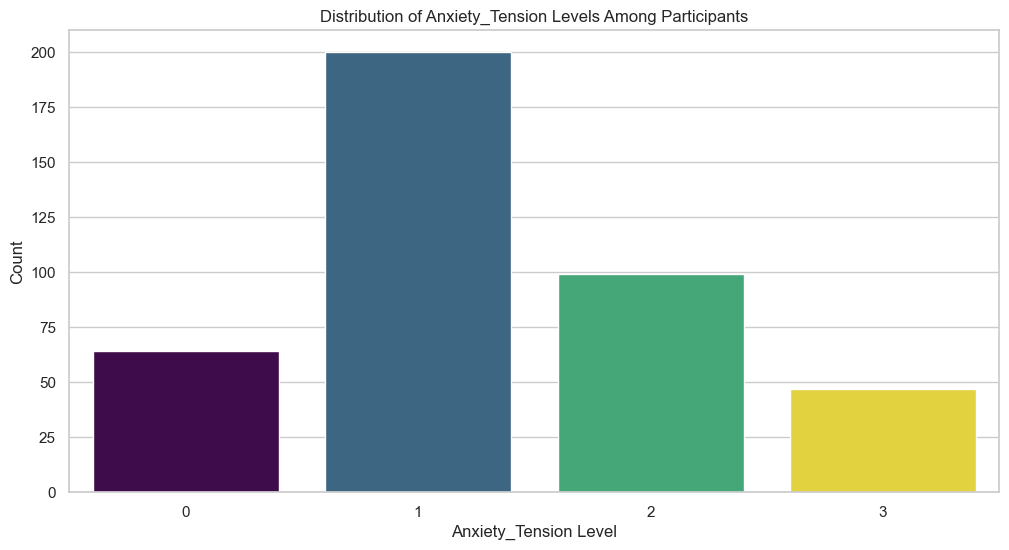

In [155]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots

# Creating a bar plot for the distribution of Anxiety_Tension levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Anxiety_Tension',  hue='Anxiety_Tension', palette='viridis', legend=False)
plt.title('Distribution of Anxiety_Tension Levels Among Participants')
plt.xlabel('Anxiety_Tension Level')
plt.ylabel('Count')
plt.show()


### based on Anxiety and depression

In [18]:
columns_hypothesis_1 = [
    'Sleep_Method',
    'Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation', 'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings',
    'PPD_Laugh', 'PPD_Confident', 'PPD_Guilt', 'PPD_Anxiety', 'PPD_Fear', 'PPD_Overwhelmed', 'PPD_Sleep', 'PPD_Sadness', 'PPD_Crying', 'PPD_Self_Harm'
]

data_hypothesis_1 = df[columns_hypothesis_1].copy()

In [28]:
data_hypothesis_1['Anxiety_Total'] = data_hypothesis_1[['Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation', 'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings']].sum(axis=1)
data_hypothesis_1['PPD_Total'] = data_hypothesis_1[['PPD_Laugh', 'PPD_Confident', 'PPD_Guilt','PPD_Anxiety','PPD_Fear','PPD_Overwhelmed', 'PPD_Sleep', 'PPD_Sadness', 'PPD_Crying', 'PPD_Self_Harm']].sum(axis=1)


In [21]:
data_hypothesis_1['Sleep_Method'] = data_hypothesis_1['Sleep_Method'].map({
    1: "Fed to sleep",
    2: "Rocked to sleep",
    3: "Held to sleep",
    4: "Alone in crib",
    5: "Crib with parent present"
})

In [11]:
print(data_hypothesis_1.isnull().sum())


Sleep_Method              0
Anxiety_Tension           0
Anxiety_Fear              0
Anxiety_Worry             0
Anxiety_Relaxation        0
Anxiety_Panic             0
Anxiety_Restlessness      0
Anxiety_Panic_Feelings    0
Anxiety_Total             0
dtype: int64


In [53]:
print(data_hypothesis_1.groupby('Sleep_Method')['Anxiety_Total'].describe())


                          count      mean       std  min  25%  50%   75%   max
Sleep_Method                                                                  
Alone in crib             177.0  7.632768  3.921915  0.0  4.0  7.0  10.0  19.0
Crib with parent present   47.0  8.893617  5.065802  1.0  4.0  9.0  13.0  19.0
Fed to sleep               90.0  7.422222  4.502129  0.0  5.0  6.0  10.0  20.0
Held to sleep              22.0  7.863636  4.109170  1.0  5.5  7.0   9.0  19.0
Rocked to sleep            74.0  8.162162  4.207062  1.0  5.0  8.0  11.0  19.0


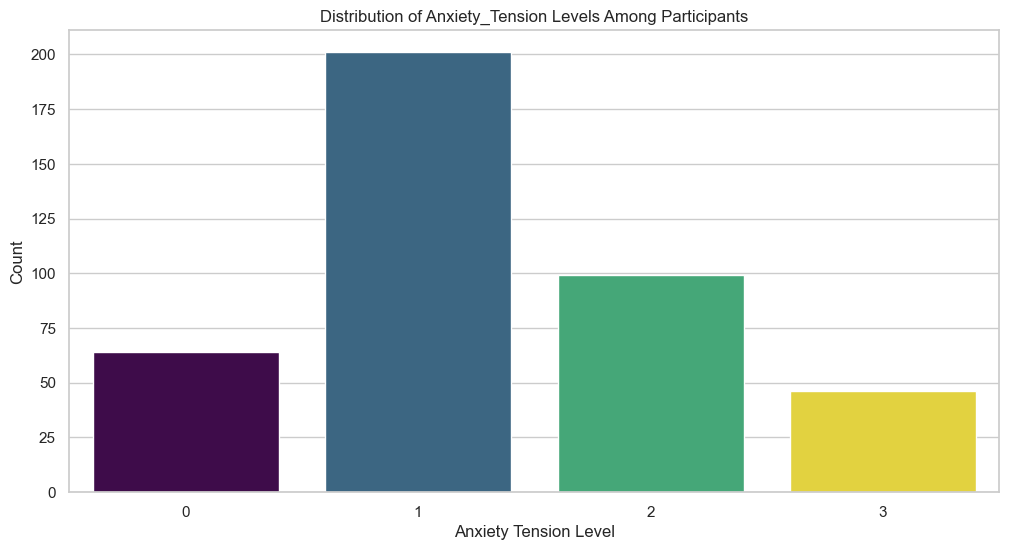

In [126]:


plt.figure(figsize=(12, 6))
sns.countplot(data=data_hypothesis_1, x='Anxiety_Tension', hue='Anxiety_Tension', palette='viridis', legend=False)
plt.title('Distribution of Anxiety_Tension Levels Among Participants')
plt.xlabel('Anxiety Tension Level')
plt.ylabel('Count')
plt.show()


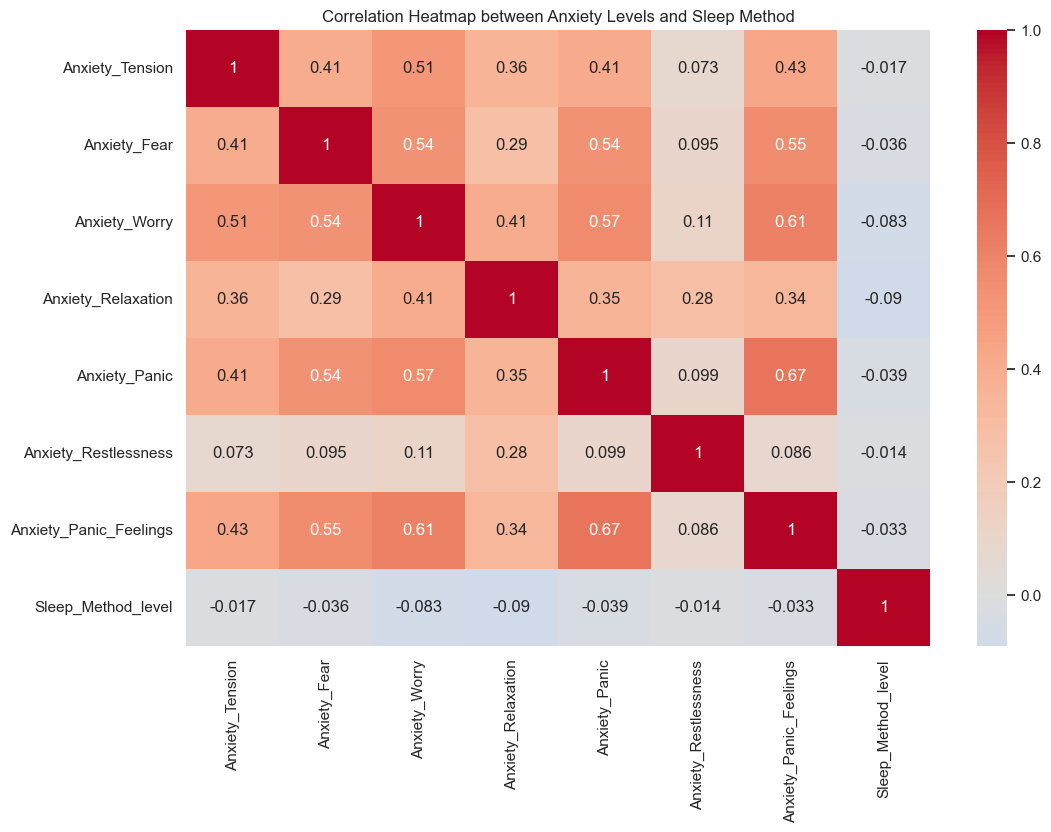

In [129]:
# Heatmap de Correlações entre Ansiedade e Método de Sono
data_hypothesis_1['Sleep_Method_level'] = df['Sleep_Method']

anxiety_columns = [
    'Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation',
    'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings'
]
correlation_data = data_hypothesis_1[anxiety_columns + ['Sleep_Method_level']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Anxiety Levels and Sleep Method')
plt.show()

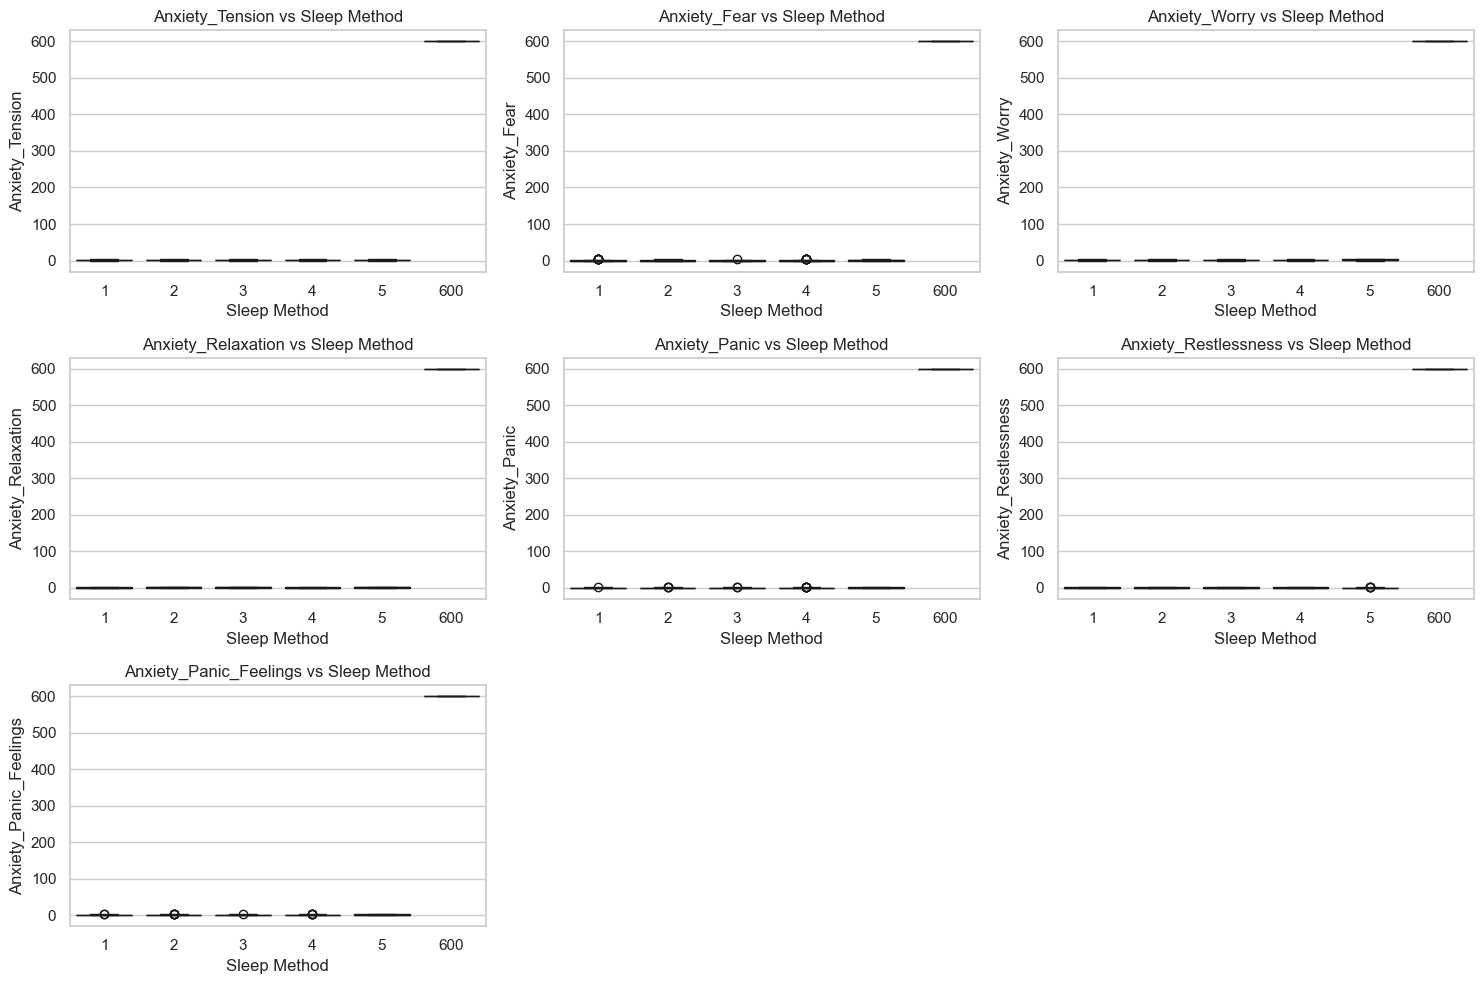

In [131]:
# Boxplots para Comparação dos Métodos de Sono
plt.figure(figsize=(15, 10))
for i, col in enumerate(anxiety_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, x='Sleep_Method', y=col,  hue='Sleep_Method', palette='viridis', legend=False)
    plt.title(f'{col} vs Sleep Method')
    plt.xlabel('Sleep Method')
    plt.ylabel(col)

plt.tight_layout()
plt.show()

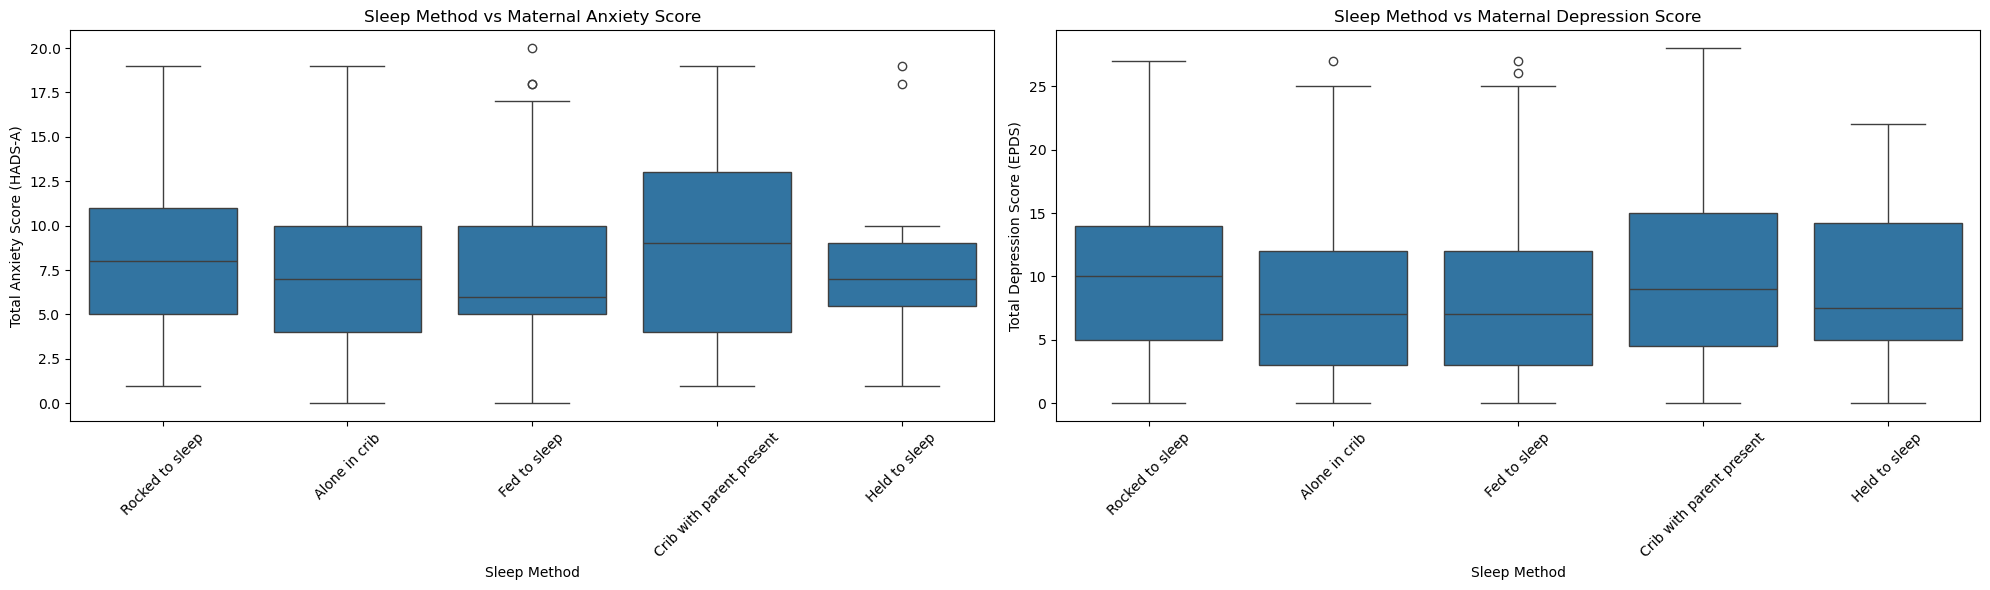

In [33]:


# Criar uma figura com duas subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Gráfico 1: Associação entre método de adormecimento e pontuação de ansiedade materna (HADS-A)
sns.boxplot(ax=axes[0], x='Sleep_Method', y='Anxiety_Total', data=data_hypothesis_1)
axes[0].set_xlabel('Sleep Method')
axes[0].set_ylabel('Total Anxiety Score (HADS-A)')
axes[0].set_title('Sleep Method vs Maternal Anxiety Score')
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Associação entre método de adormecimento e pontuação de depressão materna (EPDS)
sns.boxplot(ax=axes[1], x='Sleep_Method', y='PPD_Total', data=data_hypothesis_1)
axes[1].set_xlabel('Sleep Method')
axes[1].set_ylabel('Total Depression Score (EPDS)')
axes[1].set_title('Sleep Method vs Maternal Depression Score')
axes[1].tick_params(axis='x', rotation=45)

# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()


In [25]:

# Verificar a distribuição dos métodos de adormecimento
sleep_methods = data_hypothesis_1['Sleep_Method'].unique()

# Criar listas para armazenar as pontuações de ansiedade para cada método de adormecimento
anxiety_scores_by_method = [data_hypothesis_1[data_hypothesis_1['Sleep_Method'] == method]['Anxiety_Total'].dropna() for method in sleep_methods]

# Realizar o teste ANOVA
f_statistic_anxiety, p_value_anxiety = stats.f_oneway(*anxiety_scores_by_method)
print(f'ANOVA F-statistic (Anxiety): {f_statistic_anxiety}, p-value: {p_value_anxiety}')


ANOVA F-statistic (Anxiety): 1.1476491837063418, p-value: 0.3336282261702678


In [26]:
# Criar listas para armazenar as pontuações de depressão para cada método de adormecimento
depression_scores_by_method = [data_hypothesis_1[data_hypothesis_1['Sleep_Method'] == method]['PPD_Total'].dropna() for method in sleep_methods]

# Realizar o teste ANOVA
f_statistic_depression, p_value_depression = stats.f_oneway(*depression_scores_by_method)
print(f'ANOVA F-statistic (Depression): {f_statistic_depression}, p-value: {p_value_depression}')


ANOVA F-statistic (Depression): 1.722334545042323, p-value: 0.14412974993083028


In [32]:
# Realizar o teste de Tukey para as pontuações de depressão
tukey_result = pairwise_tukeyhsd(endog=data_hypothesis_1['PPD_Total'],
                                 groups=data_hypothesis_1['Sleep_Method'],
                                 alpha=0.05)
print(tukey_result)


                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                  
         group1                   group2          meandiff p-adj   lower  upper  reject
---------------------------------------------------------------------------------------
           Alone in crib Crib with parent present   2.0353 0.3509 -0.9924 5.0631  False
           Alone in crib             Fed to sleep   0.3616 0.9938 -2.0272 2.7504  False
           Alone in crib            Held to sleep   1.3313 0.9061 -2.8399 5.5025  False
           Alone in crib          Rocked to sleep   1.9922 0.2064  -0.562 4.5465  False
Crib with parent present             Fed to sleep  -1.6738 0.6401 -4.9944 1.6469  False
Crib with parent present            Held to sleep  -0.7041 0.9943 -5.4705 4.0624  False
Crib with parent present          Rocked to sleep  -0.0431    1.0 -3.4847 3.3985  False
            Fed to sleep            Held to sleep   0.9697 0.9742 -3.4187 5.3581  False
            Fed to sleep        

### Based on Sleep metrics of the baby.

In [143]:
# Selecionar as colunas relevantes para a Hipótese
columns_hypothesis = [
    'Sleep_Method',
    'Night_Wakings',
    'Sleep_Duration'
]

# Criar um novo DataFrame com as colunas relevantes para a Hipótese
data_hypothesis = df[columns_hypothesis].copy()
data_hypothesis['Sleep_Method_level'] = df['Sleep_Method'].copy()

# Mapear os métodos de adormecimento para rótulos compreensíveis
data_hypothesis['Sleep_Method'] = data_hypothesis['Sleep_Method'].map({
    1: "Fed to sleep",
    2: "Rocked to sleep",
    3: "Held to sleep",
    4: "Alone in crib",
    5: "Crib with parent present"
})


In [146]:
data_hypothesis

,Sleep_Method,Night_Wakings,Sleep_Duration,Sleep_Method_level
0,Rocked to sleep,3,600,2
1,Alone in crib,0,660,4
2,Rocked to sleep,1,720,2
3,Fed to sleep,2,660,1
4,Alone in crib,1,630,4
...,...,...,...,...
405,Rocked to sleep,1,540,2
406,Alone in crib,0,720,4
407,Crib with parent present,2,600,5
408,Alone in crib,0,690,4


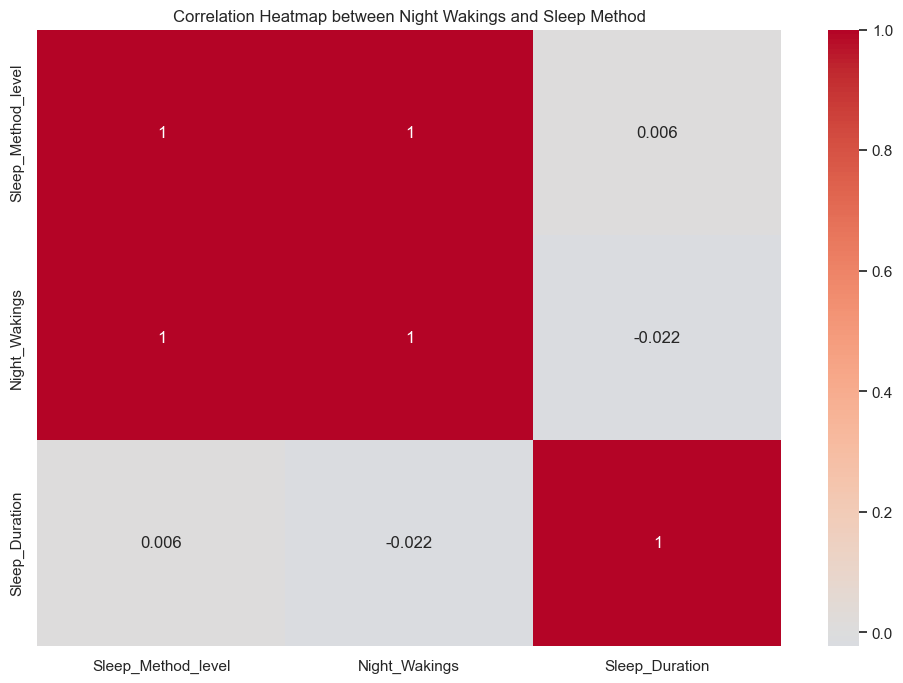

In [148]:
correlation_data = data_hypothesis[['Sleep_Method_level','Night_Wakings', 'Sleep_Duration']]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Night Wakings and Sleep Method')
plt.show()

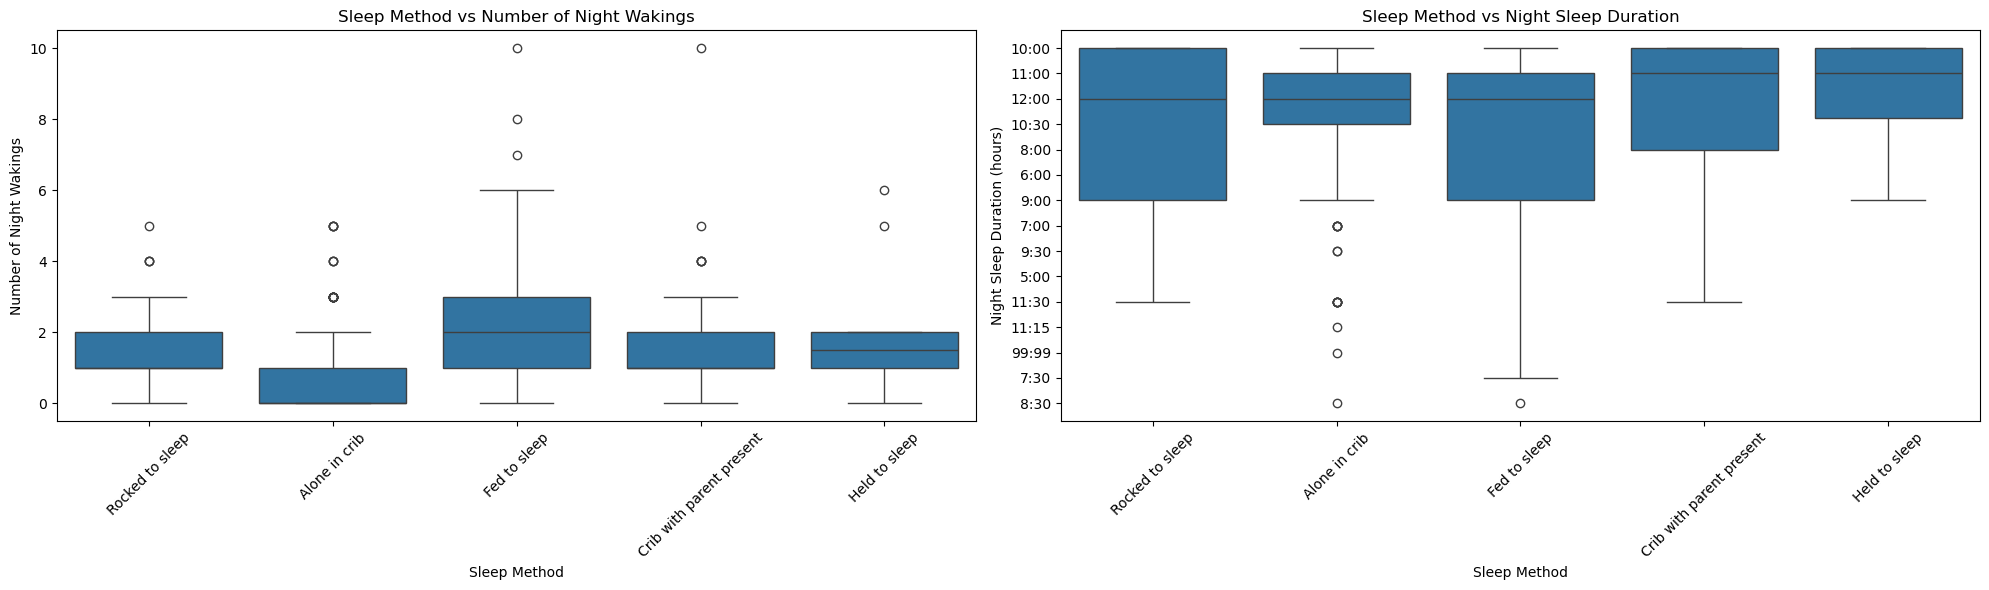

In [36]:
fig, axes = plt.subplots(1, 2, figsize=(20, 6))


# Comparar a duração do sono noturno entre diferentes métodos de adormecimento
sns.boxplot(ax=axes[1], x='Sleep_Method', y='Sleep_Duration', data=data_hypothesis)
axes[1].set_xlabel('Sleep Method')
axes[1].set_ylabel('Night Sleep Duration (hours)')
axes[1].set_title('Sleep Method vs Night Sleep Duration')
axes[1].tick_params(axis='x', rotation=45)

# Comparar o número de despertares noturnos entre diferentes métodos de adormecimento

sns.boxplot(ax=axes[0],x='Sleep_Method', y='Night_Wakings', data=data_hypothesis)
axes[0].set_xlabel('Sleep Method')
axes[0].set_ylabel('Number of Night Wakings')
axes[0].set_title('Sleep Method vs Number of Night Wakings')
axes[0].tick_params(axis='x',rotation=45)


# Ajustar o layout para evitar sobreposição
plt.tight_layout()

# Mostrar a figura
plt.show()

In [47]:

# Estatísticas descritivas para a duração do sono noturno
print(data_hypothesis.groupby('Sleep_Method')['Sleep_Duration'].describe())


                          count        mean         std    min    25%    50%  \
Sleep_Method                                                                   
Alone in crib             177.0  673.016949  411.664960  360.0  600.0  660.0   
Crib with parent present   47.0  600.000000   76.868041  420.0  555.0  600.0   
Fed to sleep               90.0  573.000000   99.757571  300.0  517.5  600.0   
Held to sleep              22.0  604.090909   54.218174  480.0  600.0  600.0   
Rocked to sleep            74.0  591.486486   89.728394  300.0  540.0  600.0   

                            75%     max  
Sleep_Method                             
Alone in crib             720.0  6039.0  
Crib with parent present  660.0   720.0  
Fed to sleep              660.0   720.0  
Held to sleep             652.5   720.0  
Rocked to sleep           652.5   720.0  


In [48]:

# Estatísticas descritivas para o número de despertares noturnos
print(data_hypothesis.groupby('Sleep_Method')['Night_Wakings'].describe())


                          count      mean       std  min  25%  50%  75%   max
Sleep_Method                                                                 
Alone in crib             177.0  0.853107  1.168188  0.0  0.0  0.0  1.0   5.0
Crib with parent present   47.0  1.765957  1.784142  0.0  1.0  1.0  2.0  10.0
Fed to sleep               90.0  2.422222  1.988607  0.0  1.0  2.0  3.0  10.0
Held to sleep              22.0  1.727273  1.386390  0.0  1.0  1.5  2.0   6.0
Rocked to sleep            74.0  1.351351  1.163750  0.0  1.0  1.0  2.0   5.0


In [44]:
data_hypothesis.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 410 entries, 0 to 409
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Sleep_Method    410 non-null    object
 1   Night_Wakings   410 non-null    int64 
 2   Sleep_Duration  410 non-null    object
dtypes: int64(1), object(2)
memory usage: 9.7+ KB


In [49]:

# Verificar a distribuição dos métodos de adormecimento
sleep_methods = data_hypothesis['Sleep_Method'].unique()

# Criar listas para armazenar a duração do sono noturno para cada método de adormecimento
sleep_duration_by_method = [data_hypothesis[data_hypothesis['Sleep_Method'] == method]['Sleep_Duration'].dropna() for method in sleep_methods]

# Realizar o teste ANOVA
f_statistic_duration, p_value_duration = stats.f_oneway(*sleep_duration_by_method)
print(f'ANOVA F-statistic (Sleep Duration): {f_statistic_duration}, p-value: {p_value_duration}')

# Criar listas para armazenar o número de despertares noturnos para cada método de adormecimento
night_wakings_by_method = [data_hypothesis[data_hypothesis['Sleep_Method'] == method]['Night_Wakings'].dropna() for method in sleep_methods]

# Realizar o teste ANOVA
f_statistic_wakings, p_value_wakings = stats.f_oneway(*night_wakings_by_method)
print(f'ANOVA F-statistic (Night Wakings): {f_statistic_wakings}, p-value: {p_value_wakings}')


ANOVA F-statistic (Sleep Duration): 2.4752873984006345, p-value: 0.04382307755350597
ANOVA F-statistic (Night Wakings): 17.90006465255076, p-value: 1.5157698622795767e-13


# Question 2:
## Influence of Maternal Anxiety Level on Baby's Night Awakenings

In [54]:
from scipy.stats import pearsonr

# Lista das colunas relevantes para a Hipótese 5
columns_hypothesis_5 = [
    'Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation', 'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings',
    'Night_Wakings'
]

# Criar um novo DataFrame com as colunas relevantes para a Hipótese 5
data_hypothesis_5 = df[columns_hypothesis_5].copy()

# Calcular as pontuações totais de ansiedade (HADS-A)
data_hypothesis_5['Anxiety_Total'] = data_hypothesis_1['Anxiety_Total'].copy()


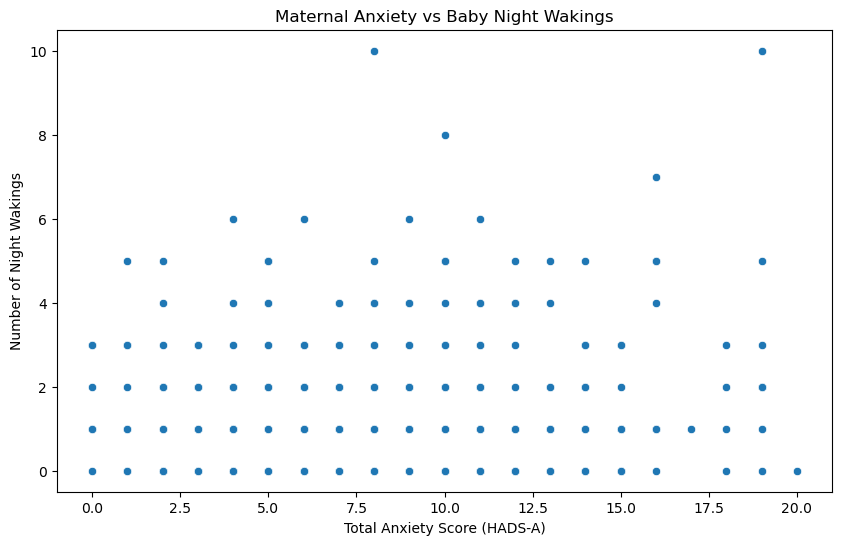

In [60]:

# Visualizar a relação entre ansiedade materna e despertares noturnos do bebê
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anxiety_Total', y='Night_Wakings', data=data_hypothesis_5)
plt.xlabel('Total Anxiety Score (HADS-A)')
plt.ylabel('Number of Night Wakings')
plt.title('Maternal Anxiety vs Baby Night Wakings')
plt.show()


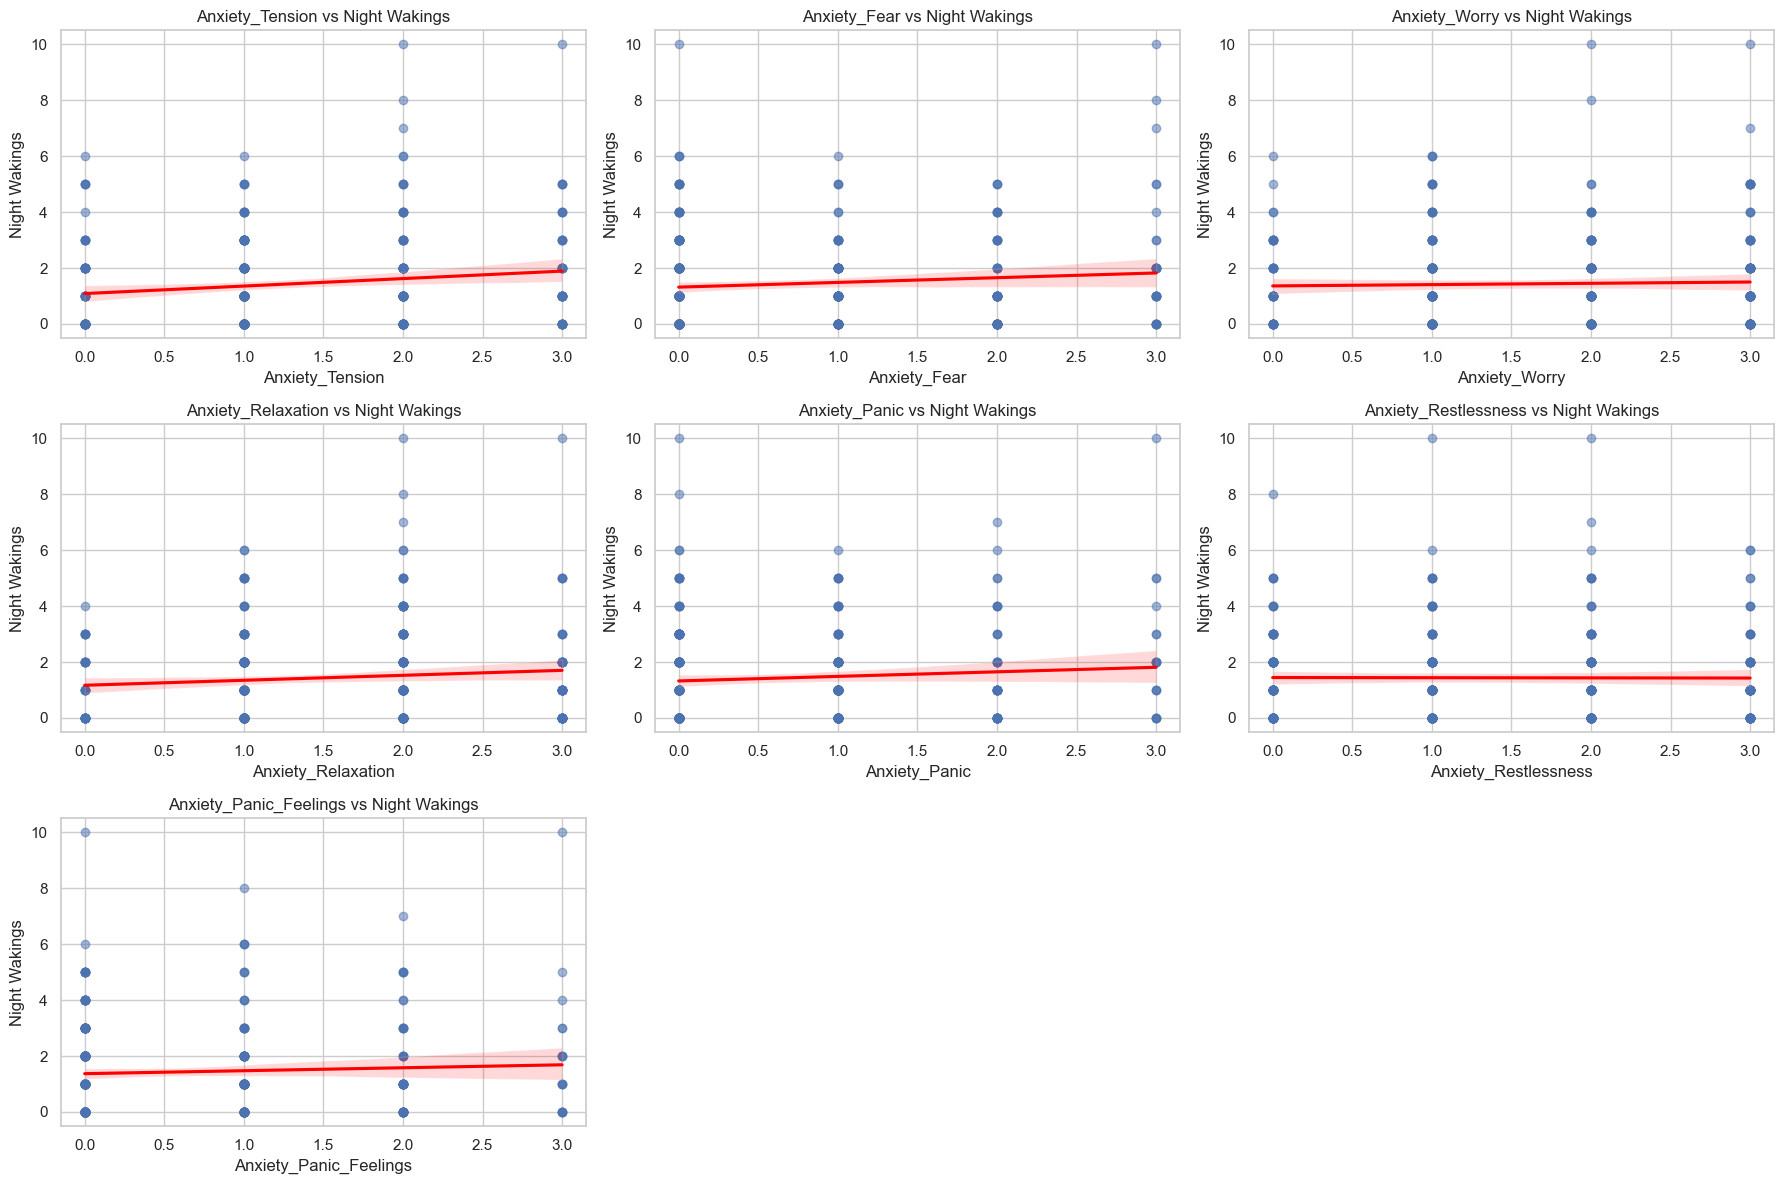

In [132]:
anxiety_columns = ['Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation', 'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings']
awakening_column = 'Night_Wakings'

# Scatter Plot e Regressão Linear para cada métrica de ansiedade
plt.figure(figsize=(18, 12))

for i, col in enumerate(anxiety_columns, 1):
    plt.subplot(3, 3, i)
    sns.regplot(x=data_hypothesis_5[col], y=data_hypothesis_5[awakening_column], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    plt.title(f'{col} vs Night Wakings')
    plt.xlabel(col)
    plt.ylabel('Night Wakings')

plt.tight_layout()
plt.show()

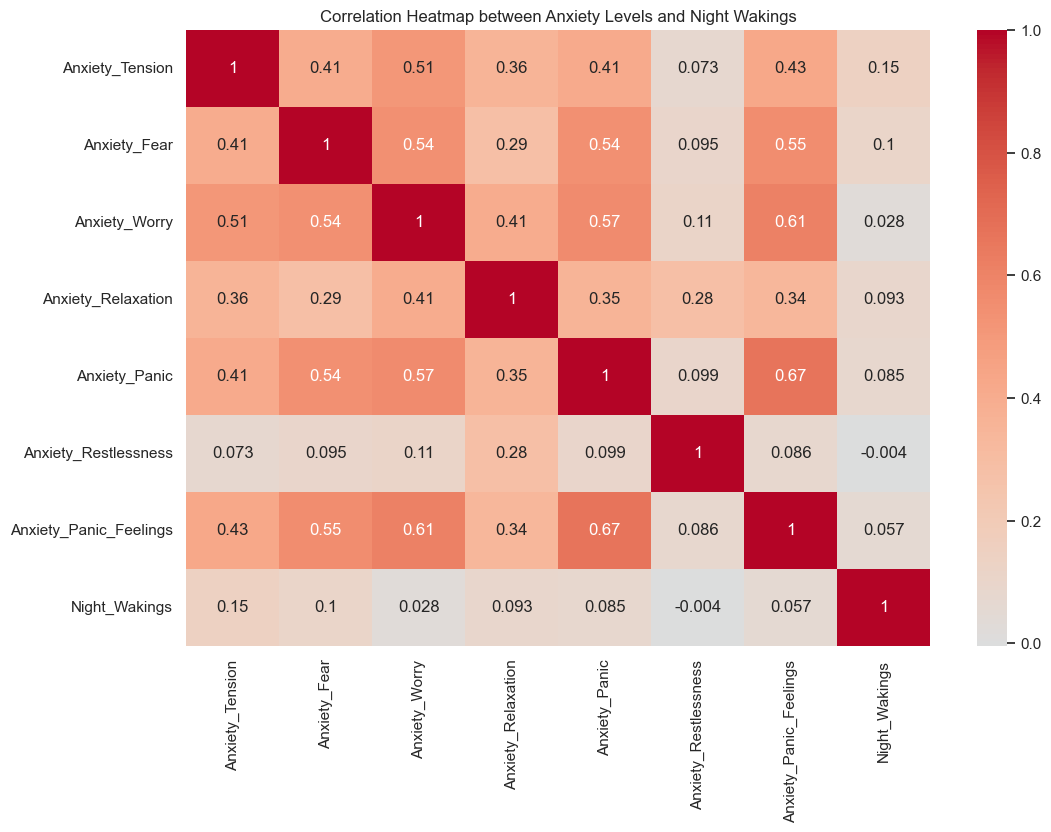

In [133]:
# Heatmap de Correlações
correlation_data = data_hypothesis_5[anxiety_columns + [awakening_column]]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between Anxiety Levels and Night Wakings')
plt.show()


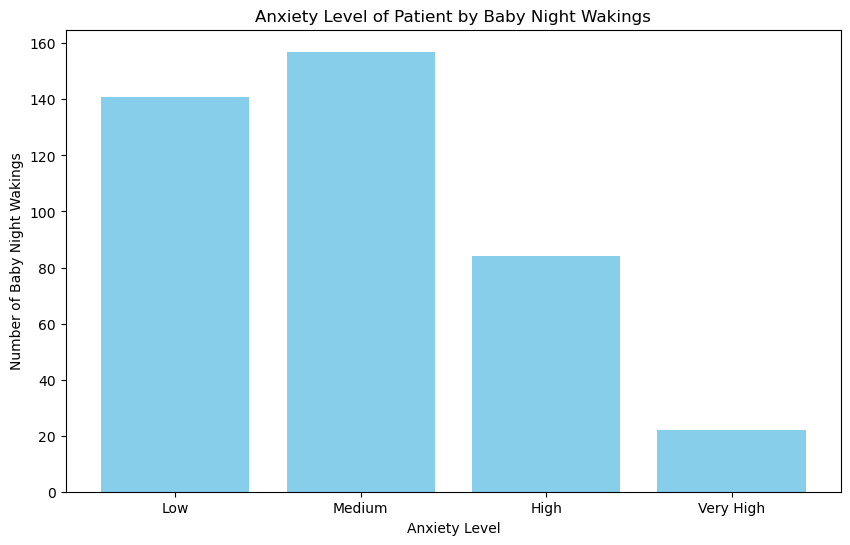

In [78]:
import warnings

# Suprimir o FutureWarning específico
warnings.filterwarnings("ignore", category=FutureWarning, message=".*observed=False is deprecated.*")


# Categorizar a ansiedade materna
bins = [0, 5, 10, 15, 20]
labels = ['Low', 'Medium', 'High', 'Very High']
data_hypothesis_5['Anxiety_Category'] = pd.cut(data_hypothesis_5['Anxiety_Total'], bins=bins, labels=labels)

# Calcular a média de despertares noturnos para cada categoria de ansiedade
mean_wakings = data_hypothesis_5.groupby('Anxiety_Category')['Night_Wakings'].count().reset_index()

# Criar o gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(mean_wakings['Anxiety_Category'], mean_wakings['Night_Wakings'], color='skyblue')
plt.xlabel('Anxiety Level')
plt.ylabel('Number of Baby Night Wakings')
plt.title('Anxiety Level of Patient by Baby Night Wakings')
plt.show()

In [57]:

# Estatísticas descritivas para a pontuação total de ansiedade materna
print(data_hypothesis_5['Anxiety_Total'].describe())


count    410.000000
mean       7.839024
std        4.259715
min        0.000000
25%        5.000000
50%        7.000000
75%       11.000000
max       20.000000
Name: Anxiety_Total, dtype: float64


In [58]:

# Estatísticas descritivas para o número de despertares noturnos
print(data_hypothesis_5['Night_Wakings'].describe())


count    410.000000
mean       1.439024
std        1.589218
min        0.000000
25%        0.000000
50%        1.000000
75%        2.000000
max       10.000000
Name: Night_Wakings, dtype: float64


In [59]:

# Calcular a correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_5['Anxiety_Total'].dropna(), data_hypothesis_5['Night_Wakings'].dropna())
print(f'Pearson Correlation: {correlation}, p-value: {p_value}')


Pearson Correlation: 0.10436958314160383, p-value: 0.03463127543052989


In [ ]:

# Calcular as pontuações totais de ansiedade (HADS-A)
data_hypothesis_5['Anxiety_Total'] = data_hypothesis_1['Anxiety_Total'].copy()

# Exibir as primeiras linhas do DataFrame preparado
print(data_hypothesis_5.head())

# Visualizar a relação entre ansiedade materna e despertares noturnos do bebê
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Anxiety_Total', y='Night_Wakings', data=data_hypothesis_5)
plt.xlabel('Total Anxiety Score (HADS-A)')
plt.ylabel('Number of Night Wakings')
plt.title('Maternal Anxiety vs Baby Night Wakings')
plt.show()

# Estatísticas descritivas para a pontuação total de ansiedade materna
print(data_hypothesis_5['Anxiety_Total'].describe())

# Estatísticas descritivas para o número de despertares noturnos
print(data_hypothesis_5['Night_Wakings'].describe())

# Calcular a correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_5['Anxiety_Total'].dropna(), data_hypothesis_5['Night_Wakings'].dropna())
print(f'Pearson Correlation: {correlation}, p-value: {p_value}')


# Effect of Birth-Related Post-Traumatic Stress on Baby’s Night Sleep Duration:

# Question 3: 
##  What is the distribution of sleep methods ('Sleep Method') used for babies and how is this related to the frequency of night wakings ('Night_Wakings')?

In [ ]:
# Contagem dos métodos de sono
sleep_method_counts = sleepdata['Sleep_Method'].value_counts()
print(sleep_method_counts)


Sleep_Method
4    177
1     90
2     74
5     47
3     22
Name: count, dtype: int64


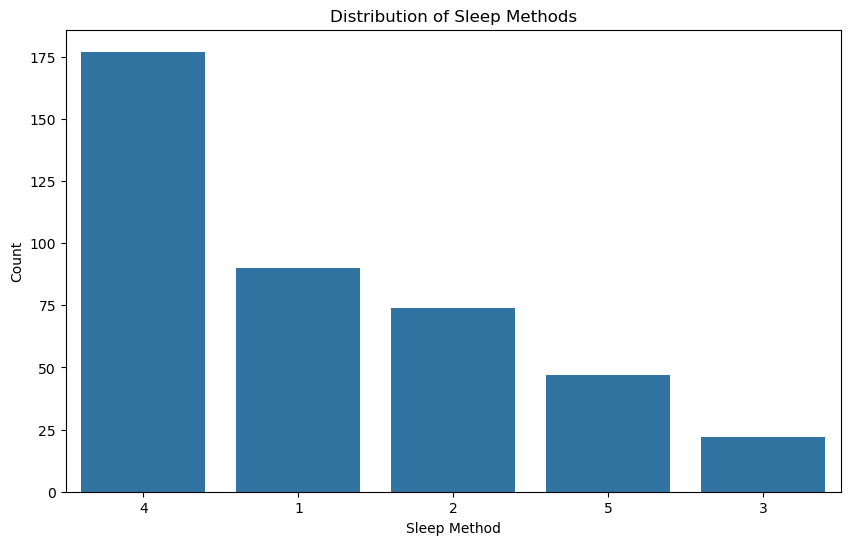

In [ ]:

plt.figure(figsize=(10, 6))
sns.countplot(data=sleepdata, x='Sleep_Method', order=sleep_method_counts.index)
plt.title('Distribution of Sleep Methods')
plt.xlabel('Sleep Method')
plt.ylabel('Count')
plt.show()


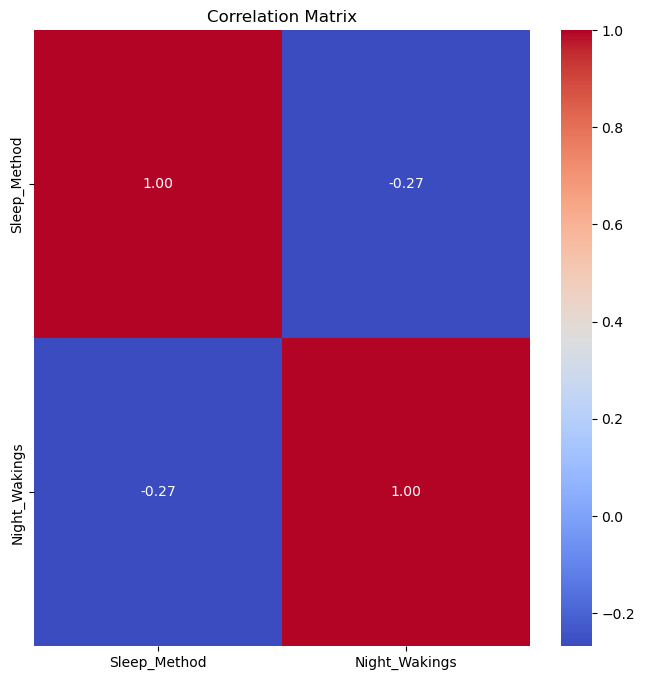

In [ ]:
correlation_matrix = sleepdata[['Sleep_Method', 'Night_Wakings']].corr()

# Heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Boxplot to visualize the distribution of night wakings by sleep method
plt.figure(figsize=(12, 8))
sns.boxplot(data=sleepdata, x='Sleep_Method', y='Night_Wakings')
plt.title('Distribution of Night Wakings by Sleep Method')
plt.xlabel('Sleep Method')
plt.ylabel('Night Wakings')
plt.show()


In [ ]:

# Calculating the mean night wakings by sleep method
mean_wakings_by_method = sleepdata.groupby('Sleep_Method')['Night_Wakings'].mean().sort_values()
print(mean_wakings_by_method)


Sleep_Method
4    0.853107
2    1.351351
3    1.727273
5    1.765957
1    2.422222
Name: Night_Wakings, dtype: float64


# Question 4:
## Does the total sleep duration of babies vary depending on the sleep method used?

In [ ]:
# Distribuição da duração total do sono em horas
sleepdata['Sleep_Duration_Hours'] = sleepdata['Sleep_Duration'] / 60


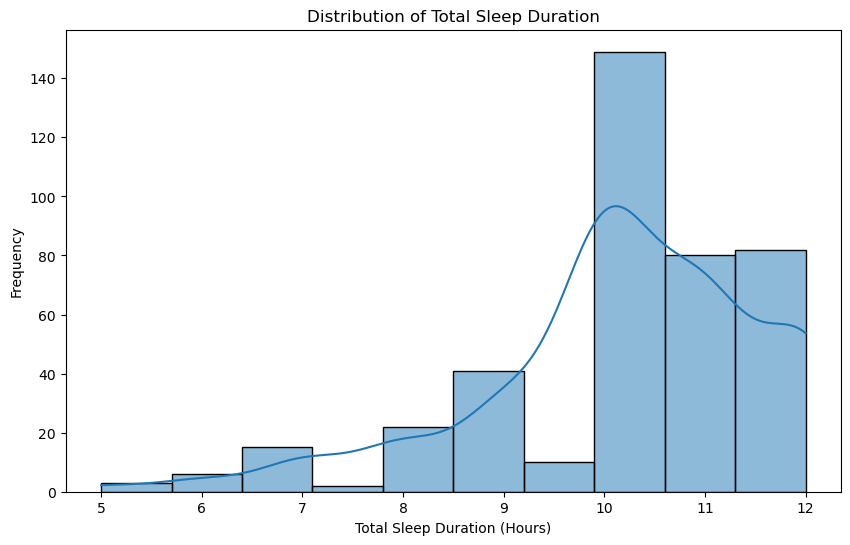

In [ ]:

plt.figure(figsize=(10, 6))
sns.histplot(sleepdata['Sleep_Duration_Hours'], bins=10, kde=True)
plt.title('Distribution of Total Sleep Duration')
plt.xlabel('Total Sleep Duration (Hours)')
plt.ylabel('Frequency')
plt.show()


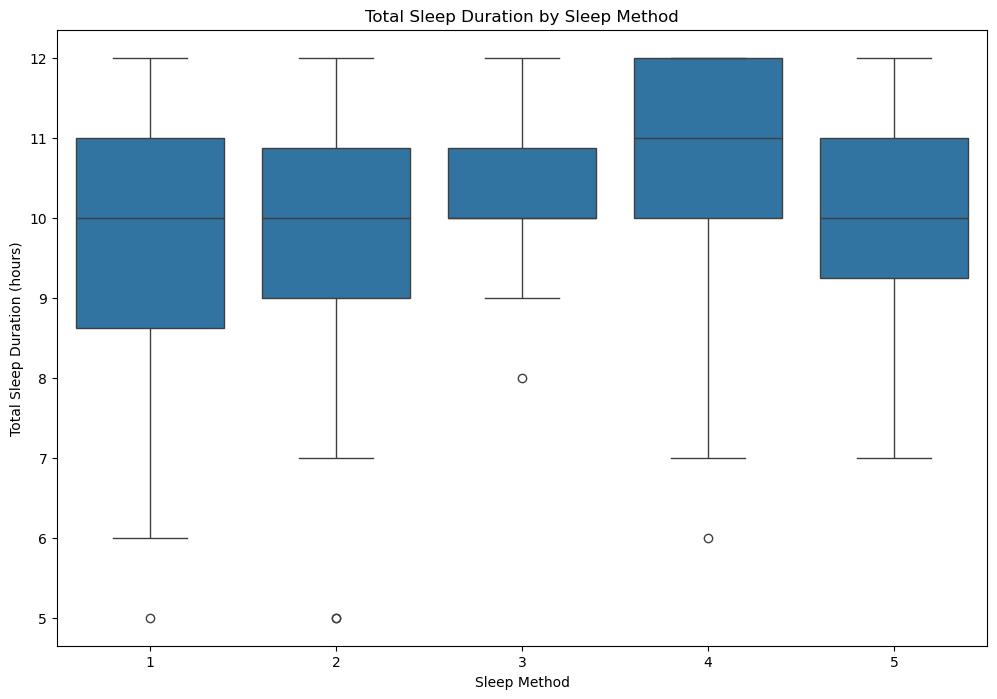

In [ ]:

# Boxplot para comparar a duração total do sono por método de sono
plt.figure(figsize=(12, 8))
sns.boxplot(data=sleepdata, x='Sleep_Method', y='Sleep_Duration_Hours')
plt.title('Total Sleep Duration by Sleep Method')
plt.xlabel('Sleep Method')
plt.ylabel('Total Sleep Duration (hours)')
plt.show()


In [ ]:

# Calcular a média da duração total do sono por método de sono
mean_sleep_duration_by_method = sleepdata.groupby('Sleep_Method')['Sleep_Duration_Hours'].mean().sort_values()
print(mean_sleep_duration_by_method)


Sleep_Method
1     9.550000
2     9.858108
5    10.000000
3    10.068182
4    10.704802
Name: Sleep_Duration_Hours, dtype: float64


In [ ]:

# Realizar testes de significância (ANOVA) para verificar diferenças entre os grupos
import scipy.stats as stats

sleep_duration_groups = []

for method in sleepdata['Sleep_Method'].unique():
    sleep_duration_for_method = sleepdata['Sleep_Duration_Hours'][sleepdata['Sleep_Method'] == method]
    sleep_duration_groups.append(sleep_duration_for_method)

anova_result = stats.f_oneway(*sleep_duration_groups)

print(f'ANOVA result: F-value = {anova_result.statistic:.2f}, p-value = {anova_result.pvalue:.5f}')



ANOVA result: F-value = 12.79, p-value = 0.00000


In [95]:
# Lista das colunas relevantes para a Hipótese 6
columns_hypothesis_6 = [
    'PTSD_Intrusions', 'PTSD_Nightmares', 'PTSD_Flashbacks', 'PTSD_Disturbance', 'PTSD_Anxiety', 'PTSD_Avoidance_Thoughts', 'PTSD_Avoidance_Reminders',
    'PTSD_Memory_Loss', 'PTSD_Guilt', 'PTSD_Negative_Emotions', 'PTSD_Negative_Beliefs', 'PTSD_Loss_Interest', 'PTSD_Detachment', 'PTSD_No_Positive_Emotions',
    'PTSD_Irritability', 'PTSD_Self_Destruction', 'PTSD_Tension', 'PTSD_Easily_Started', 'PTSD_Concentration', 'PTSD_Sleep_Problems',
    'Sleep_Duration'
]

# Criar um novo DataFrame com as colunas relevantes para a Hipótese 6
data_hypothesis_6 = df[columns_hypothesis_6].copy()

# Calcular as pontuações totais de PTSD (soma de todos os itens do CBTS)
data_hypothesis_6['PTSD_Total'] = data_hypothesis_6[
    ['PTSD_Intrusions', 'PTSD_Nightmares', 'PTSD_Flashbacks', 'PTSD_Disturbance', 'PTSD_Anxiety', 'PTSD_Avoidance_Thoughts', 'PTSD_Avoidance_Reminders',
     'PTSD_Memory_Loss', 'PTSD_Guilt', 'PTSD_Negative_Emotions', 'PTSD_Negative_Beliefs', 'PTSD_Loss_Interest', 'PTSD_Detachment', 'PTSD_No_Positive_Emotions',
     'PTSD_Irritability', 'PTSD_Self_Destruction', 'PTSD_Tension', 'PTSD_Easily_Started', 'PTSD_Concentration', 'PTSD_Sleep_Problems']
].sum(axis=1)



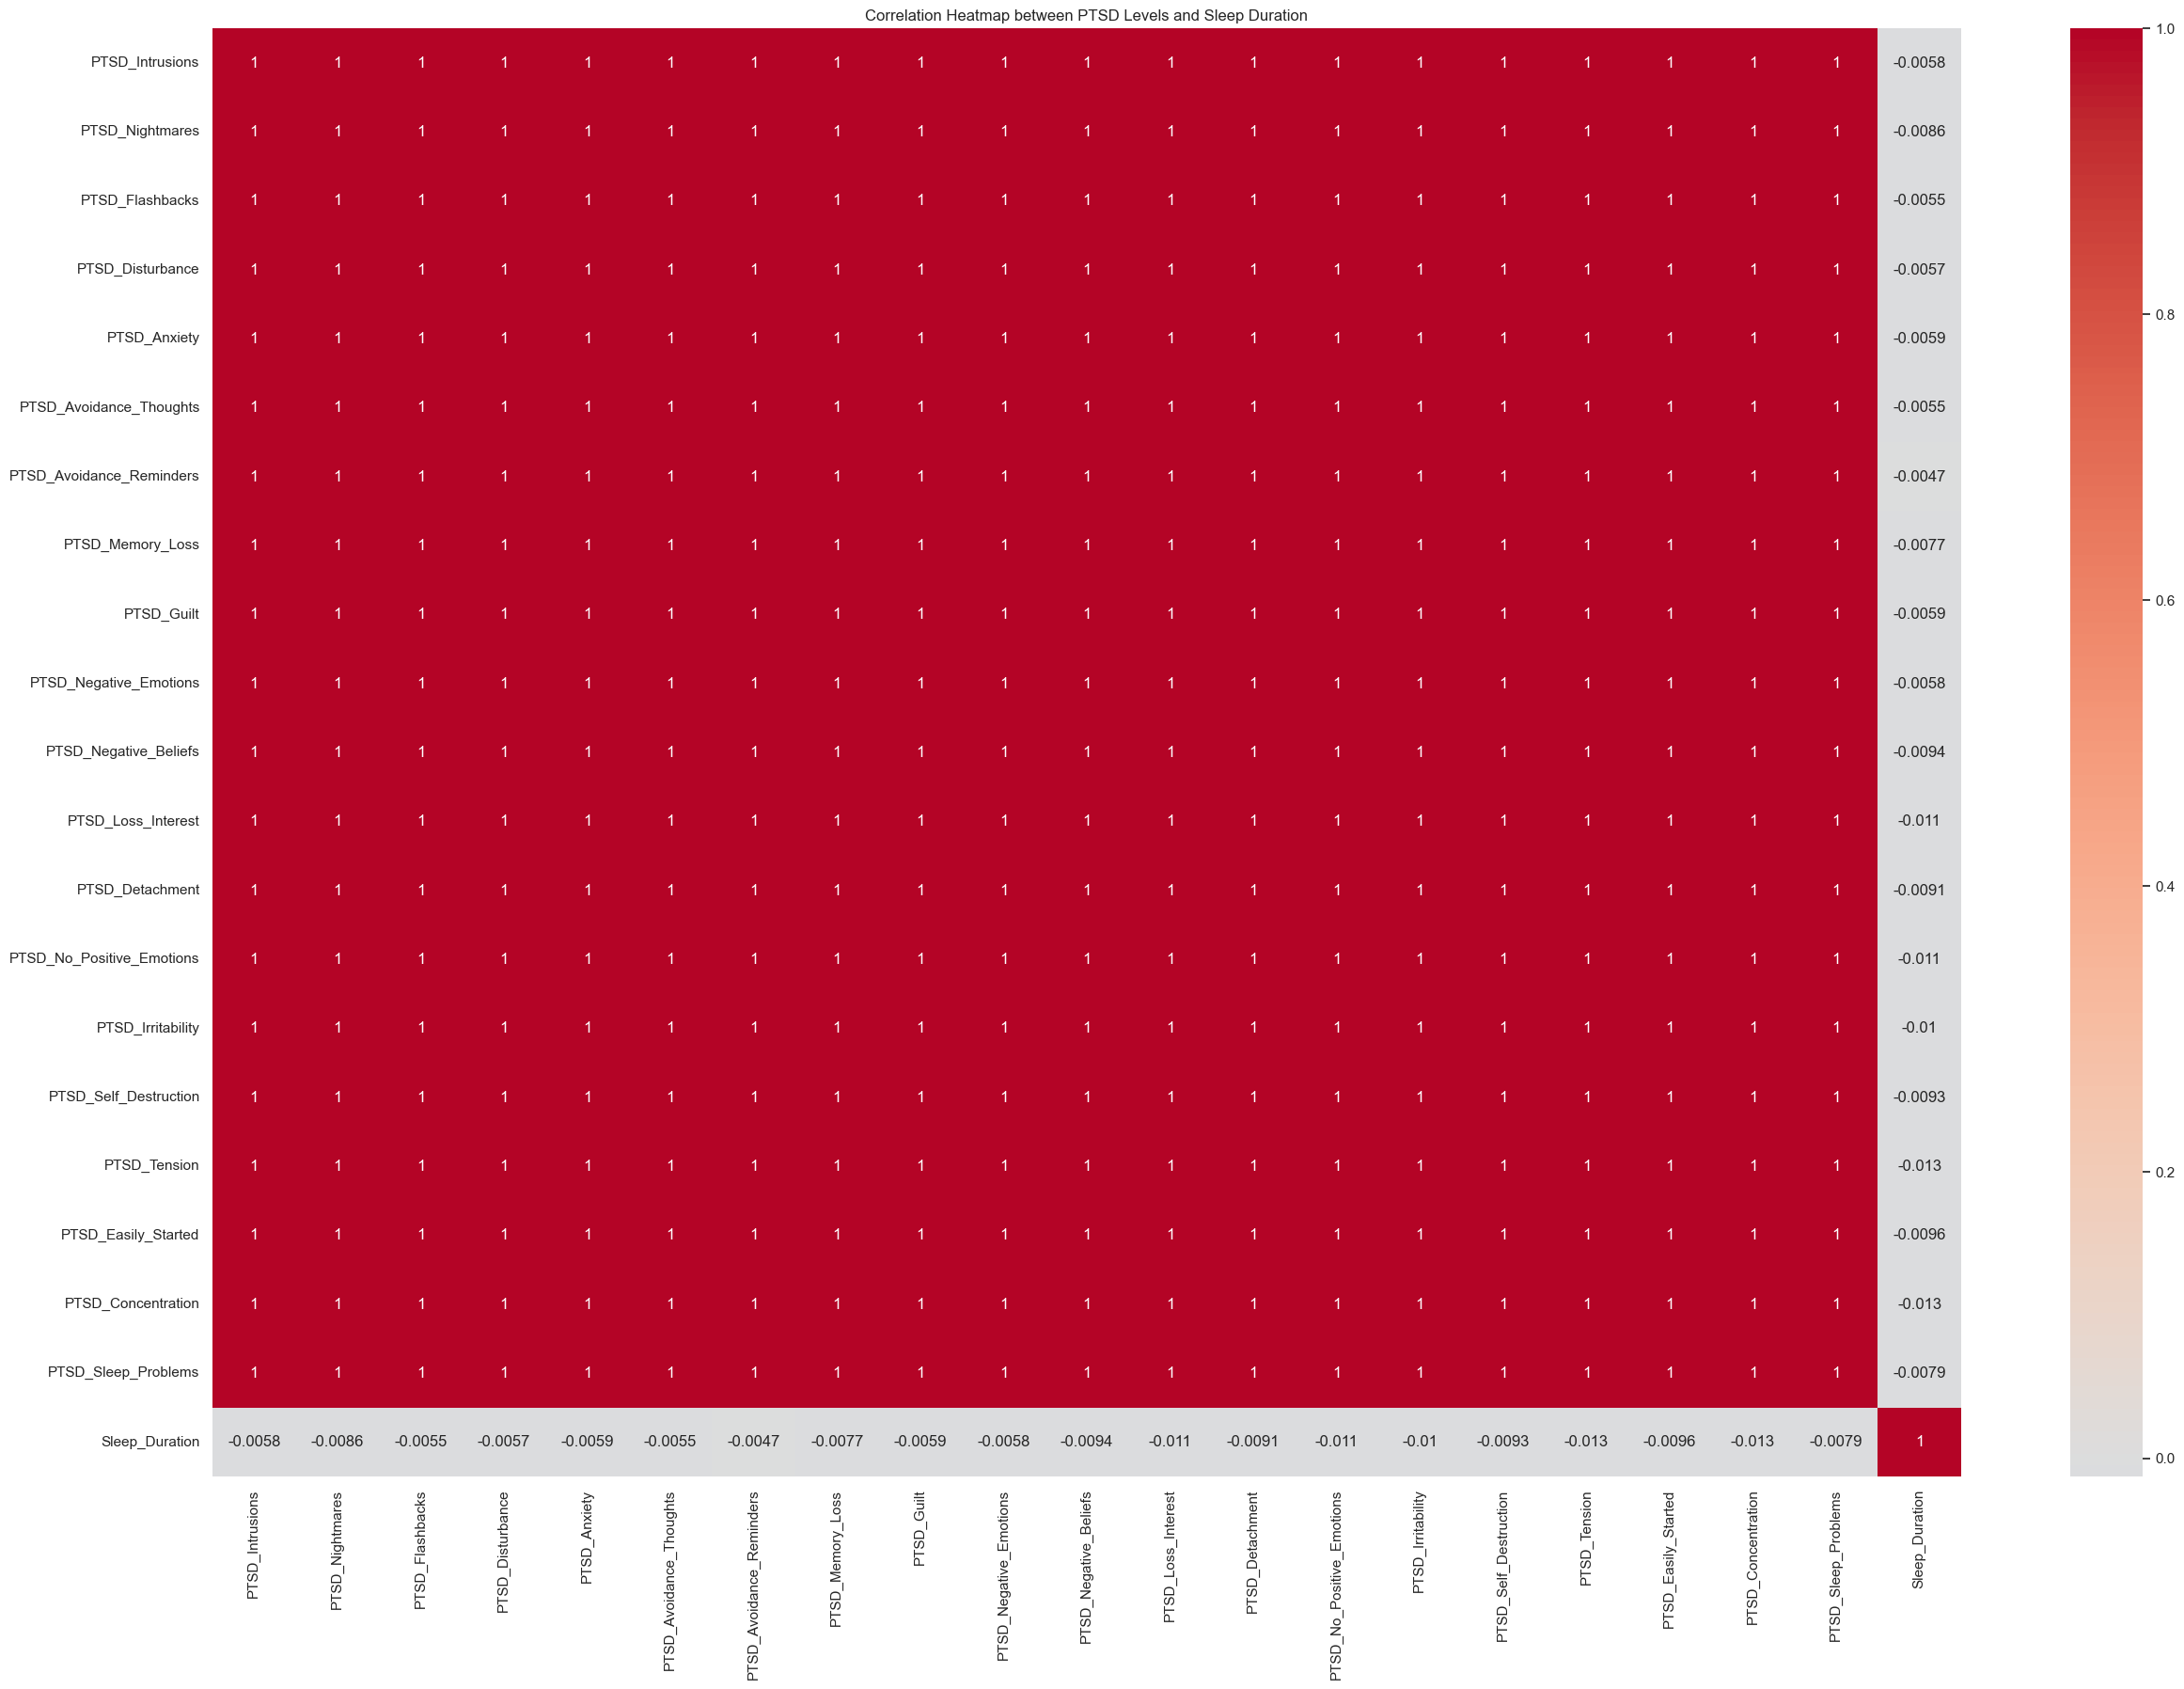

In [141]:
# Heatmap de Correlações
correlation_data = data_hypothesis_6[columns_hypothesis_6]
correlation_matrix = correlation_data.corr()

plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Heatmap between PTSD Levels and Sleep Duration')
plt.show()


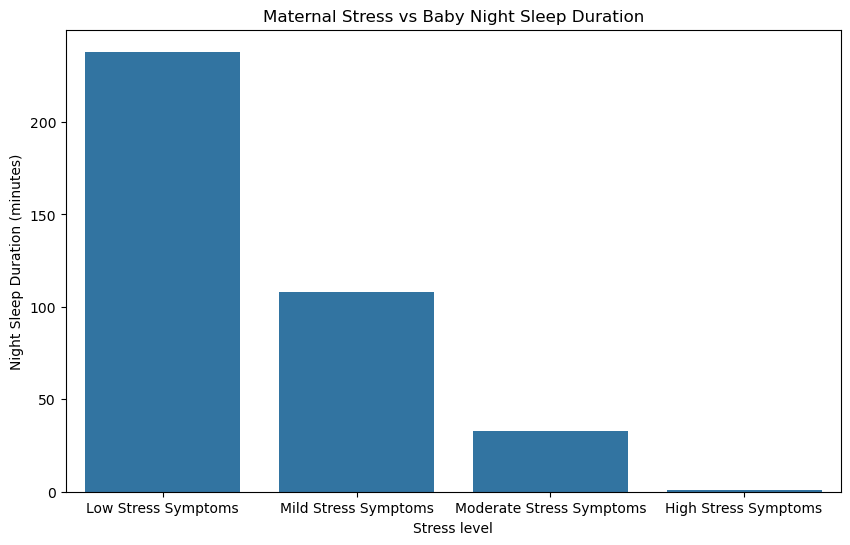

In [111]:
bins = [0, 15, 30, 45, 60]
labels = ["Low Stress Symptoms", "Mild Stress Symptoms", "Moderate Stress Symptoms", "High Stress Symptoms"]
data_hypothesis_6['PTSD_Category'] = pd.cut(data_hypothesis_6['PTSD_Total'], bins=bins, labels=labels)

mean_stress = data_hypothesis_6.groupby('PTSD_Category')['Sleep_Duration'].count().reset_index()


# Visualizar a relação entre pontuações de PTSD e duração do sono noturno do bebê
plt.figure(figsize=(10, 6))
sns.barplot(x=mean_stress['PTSD_Category'], y=mean_stress['Sleep_Duration'], data=data_hypothesis_6)
plt.xlabel('Stress level')
plt.ylabel('Night Sleep Duration (minutes)')
plt.title('Maternal Stress vs Baby Night Sleep Duration')
plt.show()


In [109]:

# Estatísticas descritivas para a pontuação total de PTSD
print(data_hypothesis_6['PTSD_Total'].describe().T)


count      410.000000
mean        42.385366
std        592.086760
min          0.000000
25%          4.000000
50%         11.000000
75%         19.000000
max      12000.000000
Name: PTSD_Total, dtype: float64


In [99]:

# Estatísticas descritivas para a duração do sono noturno
print(data_hypothesis_6['Sleep_Duration'].describe())



count    410.000000
mean     611.012195
std       85.871128
min      300.000000
25%      600.000000
50%      600.000000
75%      660.000000
max      720.000000
Name: Sleep_Duration, dtype: float64


In [100]:

# Calcular a correlação de Pearson
correlation, p_value = pearsonr(data_hypothesis_6['PTSD_Total'].dropna(), data_hypothesis_6['Sleep_Duration'].dropna())
print(f'Pearson Correlation: {correlation}, p-value: {p_value}')


Pearson Correlation: -0.008182791064298856, p-value: 0.8687977438348646


C:\Users\Lymaris\AppData\Local\Temp\ipykernel_24260\1137284424.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Anxiety_Tension', palette='viridis')


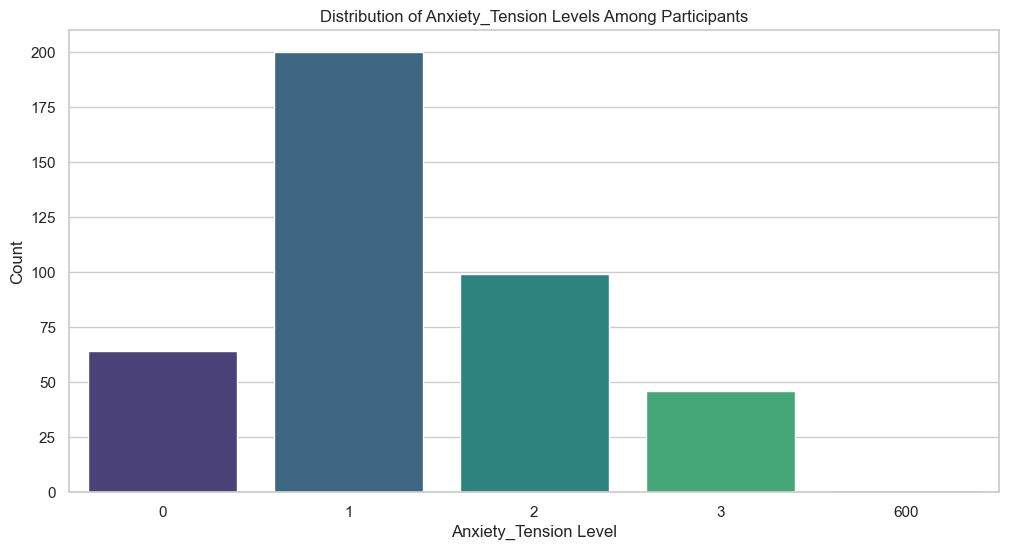

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the style for the plots
sns.set(style="whitegrid")

# Creating a bar plot for the distribution of Anxiety_Tension levels
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Anxiety_Tension', palette='viridis')
plt.title('Distribution of Anxiety_Tension Levels Among Participants')
plt.xlabel('Anxiety_Tension Level')
plt.ylabel('Count')
plt.show()


# Anxiety and depression

In [13]:
df['PPD_Symptoms'] = df[['PPD_Laugh', 'PPD_Confident', 'PPD_Guilt', 'PPD_Anxiety', 'PPD_Fear', 
                         'PPD_Overwhelmed', 'PPD_Sleep', 'PPD_Sadness', 'PPD_Crying', 'PPD_Self_Harm']].sum(axis=1) > 0

df['Anxiety_Symptoms'] = df[['Anxiety_Tension', 'Anxiety_Fear', 'Anxiety_Worry', 'Anxiety_Relaxation', 
                             'Anxiety_Panic', 'Anxiety_Restlessness', 'Anxiety_Panic_Feelings']].sum(axis=1) > 9

df['Stress_Symptoms'] = df[['PTSD_Intrusions', 'PTSD_Nightmares', 'PTSD_Flashbacks', 'PTSD_Disturbance', 'PTSD_Anxiety', 
                            'PTSD_Avoidance_Thoughts', 'PTSD_Avoidance_Reminders', 'PTSD_Memory_Loss', 'PTSD_Guilt', 
                            'PTSD_Negative_Emotions', 'PTSD_Negative_Beliefs', 'PTSD_Loss_Interest', 'PTSD_Detachment', 
                            'PTSD_No_Positive_Emotions', 'PTSD_Irritability', 'PTSD_Self_Destruction', 'PTSD_Tension', 
                            'PTSD_Easily_Started', 'PTSD_Concentration', 'PTSD_Sleep_Problems']].sum(axis=1) > 0

df['Emotions_Symptoms'] = df[['PTSD_Negative_Emotions','PTSD_No_Positive_Emotions']].sum(axis=1) > 0

# Calculando os percentuais
percent_ppd = df['PPD_Symptoms'].mean() * 100
percent_anxiety = df['Anxiety_Symptoms'].mean() * 100
percent_stress = df['Stress_Symptoms'].mean() * 100
percent_emotions = df['Emotions_Symptoms'].mean() * 100


percent_ppd, percent_anxiety, percent_stress,percent_emotions




(92.4390243902439, 33.170731707317074, 92.92682926829269, 43.90243902439025)

# Sleep Methods

In [14]:
# Calculando a frequência de cada método de sono
sleep_method_counts = df['Sleep_Method'].value_counts()

# Convertendo as frequências em percentuais
sleep_method_percentages = (sleep_method_counts / len(df)) * 100

# Exibindo os resultados
sleep_method_percentages

Sleep_Method
4    43.170732
1    21.951220
2    18.048780
5    11.463415
3     5.365854
Name: count, dtype: float64